# Preprocessing RNA-seq data

Investigate files on [GSE223917](https://0-www-ncbi-nlm-nih-gov.brum.beds.ac.uk/geo/query/acc.cgi?acc=GSE223917) 

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

For supplementary files (bottom of the page), there are 2 types of files:
1. **Brain**
2. **EMB** (embryo?)

In [2]:
f_turbo = "/nfs/turbo/dcmb-class/bioinf593/groups/group_08/raw/rna_seq/"

f_genome = "GSE223917_brain_genome1.tsv.gz"
f_meta = "GSE223917_HiRES_brain_metadata.xlsx"
f_rna = "GSE223917_HiRES_brain.rna.umicount.tsv.gz"

## RNA-seq

In [3]:
rna = pd.read_csv(f_turbo + f_rna, compression="infer", delimiter="\t")

In [4]:
inds = rna['ValaB8w3002'].to_numpy().nonzero()[0]

In [18]:
rna['ValaB8w3002'].to_numpy().shape

(39884,)

DF is (genes x samples) 

399 total samples in DF

In [17]:
rna

,gene,ValaB8w3001,ValaB8w3002,ValaB8w3003,ValaB8w3004,ValaB8w3005,ValaB8w3006,ValaB8w3007,ValaB8w3008,ValaB8w3009,...,ValbB8w1183,ValbB8w1184,ValbB8w1185,ValbB8w1186,ValbB8w1187,ValbB8w1188,ValbB8w1189,ValbB8w1190,ValbB8w1191,ValbB8w1192
0,0610005C13Rik,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0610006L08Rik,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0610009B22Rik,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0610009E02Rik,0.0,0.0,0.5,0.0,0.0,0.666667,0.0,1.333333,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0610009L18Rik,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39879,Znf41-ps,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39880,Zp1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39881,Zscan4-ps2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39882,Zscan4-ps3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **RNA-Seq data is in units of 'counts-per-million'** (maybe not)

In [67]:
[x for x in list(rna['ValaB8w3001'].to_numpy() * 1e6) if not x.is_integer()]

[1333333.3333333333,
 333333.3333333333,
 333333.3333333333,
 5333333.333333333,
 1333333.3333333333,
 3166666.6666666665,
 333333.3333333333,
 333333.3333333333,
 2333333.333333333,
 13666666.666666664,
 333333.3333333333,
 833333.3333333333,
 666666.6666666666,
 666666.6666666666,
 333333.3333333333,
 333333.3333333333,
 1333333.3333333333,
 3833333.3333333335,
 3333333.333333333,
 333333.3333333333,
 114333333.33333331,
 3166666.6666666665,
 6666666.666666668,
 6333333.333333332,
 22333333.33333333,
 4333333.333333333,
 333333.3333333333,
 333333.3333333333,
 333333.3333333333,
 666666.6666666666,
 666666.6666666666,
 1833333.3333333333,
 7166666.666666668,
 6333333.333333332,
 333333.3333333333,
 112666666.66666669,
 336333333.3333333,
 2333333.333333333,
 333333.3333333333,
 666666.6666666666,
 666666.6666666666,
 17666666.666666668,
 2833333.333333333,
 333333.3333333333,
 333333.3333333333,
 833333.3333333333,
 333333.3333333333,
 7833333.333333332,
 833333.3333333333,
 56333333

In [84]:
interested = rna.columns[1:]
rna[interested].values.max()

1089.5

In [91]:
x = (rna['ValaB8w3001'].to_numpy()*1089.5).nonzero()[0]
for i in x:
    print(i)

5
9
15
20
22
23
26
30
32
37
41
43
44
52
53
55
56
60
62
68
70
71
76
98
100
111
122
130
131
141
146
149
155
156
191
212
217
225
241
252
257
258
302
307
312
322
329
338
345
353
359
382
386
394
421
435
436
437
439
440
441
443
445
447
462
472
477
481
498
507
509
522
526
535
538
542
557
558
562
571
579
580
584
612
619
626
636
637
639
649
654
661
663
667
673
674
677
686
689
691
694
701
712
713
715
720
726
730
734
735
736
740
748
754
769
776
778
795
803
814
818
825
850
852
854
856
865
866
878
889
898
903
911
912
919
927
959
968
982
983
985
988
989
999
1001
1004
1005
1012
1013
1014
1017
1023
1029
1031
1034
1041
1060
1068
1074
1078
1114
1115
1124
1132
1139
1144
1149
1156
1169
1178
1181
1196
1210
1221
1224
1226
1232
1233
1242
1256
1258
1265
1272
1273
1275
1294
1301
1303
1306
1307
1308
1310
1324
1330
1337
1339
1349
1350
1355
1357
1371
1373
1374
1382
1383
1388
1393
1394
1402
1413
1414
1421
1430
1441
1448
1451
1469
1479
1480
1486
1493
1496
1497
1526
1539
1543
1549
1554
1557
1569
1576
1580
1588
1593


In [86]:
# *** RNA-Seq data is in units of 'counts-per-million'
x = rna['ValaB8w3001'].to_numpy()*1e6
for i in x.nonzero()[0]:
    print(i)

5
9
15
20
22
23
26
30
32
37
41
43
44
52
53
55
56
60
62
68
70
71
76
98
100
111
122
130
131
141
146
149
155
156
191
212
217
225
241
252
257
258
302
307
312
322
329
338
345
353
359
382
386
394
421
435
436
437
439
440
441
443
445
447
462
472
477
481
498
507
509
522
526
535
538
542
557
558
562
571
579
580
584
612
619
626
636
637
639
649
654
661
663
667
673
674
677
686
689
691
694
701
712
713
715
720
726
730
734
735
736
740
748
754
769
776
778
795
803
814
818
825
850
852
854
856
865
866
878
889
898
903
911
912
919
927
959
968
982
983
985
988
989
999
1001
1004
1005
1012
1013
1014
1017
1023
1029
1031
1034
1041
1060
1068
1074
1078
1114
1115
1124
1132
1139
1144
1149
1156
1169
1178
1181
1196
1210
1221
1224
1226
1232
1233
1242
1256
1258
1265
1272
1273
1275
1294
1301
1303
1306
1307
1308
1310
1324
1330
1337
1339
1349
1350
1355
1357
1371
1373
1374
1382
1383
1388
1393
1394
1402
1413
1414
1421
1430
1441
1448
1451
1469
1479
1480
1486
1493
1496
1497
1526
1539
1543
1549
1554
1557
1569
1576
1580
1588
1593


### Top 5 genes (in terms of frequency across samples)

Celf2, Ptprd, Kcnip4, Meg3, Malat1

In [44]:
numeric = np.array(rna[rna.columns[1:]])
top_5 = np.argsort(numeric.sum(axis=1))[-5:] # indices of top 5 'most expressed' genes across samples

In [45]:
for ind in top_5:
    print(rna.iloc[ind][0])

Celf2
Ptprd
Kcnip4
Meg3
Malat1


### Genes and their phenotype ontology annotations (across all alleles)
Celf2 - neo/postnatal lethality, neuronal physiology

Ptprd - Abnormal eating behavior, abnormal spatial learning, LTP, impaired swimming, premature death

Kcnip4 - thrombocytopenia

Meg3 - Inhibits tumor cell proliferation in-vitro, excision results in angiogenesis in-vivo

Malat1 - abnormal nervous system physiology, brain inflammation, increased apoptosis, etc.

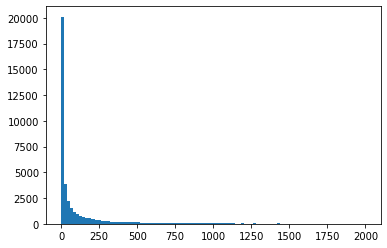

In [46]:
# Distribution of gene expression values summed across all samples - very skewed
plt.close("all")
plt.hist(numeric.sum(axis=1), bins=100, range=(0, 2000));

In [47]:
numeric = numeric.flatten()

In [48]:
numeric.shape

(15913716,)

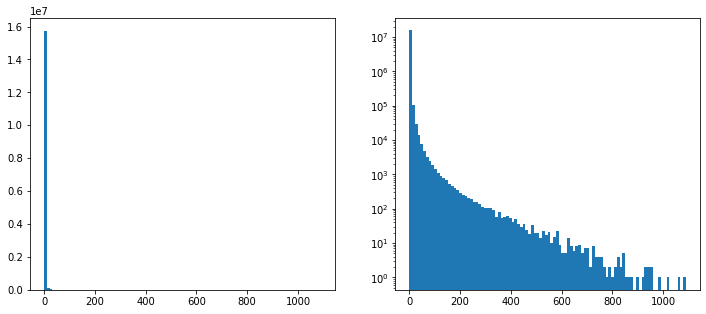

In [49]:
plt.close("all")
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax = ax.flatten()

ax[0].hist(numeric, bins=100)

ax[1].hist(numeric, bins=100)
ax[1].set_yscale('log')

plt.show()

## Genome?
- Appears to be similar to RNA-seq.. Unsure exactly 
- Genome has 433 total columns / RNA-seq has 400. Unsure which columns are present in Genome but not in RNA-seq

In [50]:
genome = pd.read_csv(f_turbo + f_genome, compression="infer", delimiter="\t")

In [51]:
genome.columns

Index(['gene', 'ValaB8w3001', 'ValaB8w3002', 'ValaB8w3003', 'ValaB8w3004',
       'ValaB8w3005', 'ValaB8w3006', 'ValaB8w3007', 'ValaB8w3008',
       'ValaB8w3009',
       ...
       'ValbB8w1183', 'ValbB8w1184', 'ValbB8w1185', 'ValbB8w1186',
       'ValbB8w1187', 'ValbB8w1188', 'ValbB8w1189', 'ValbB8w1190',
       'ValbB8w1191', 'ValbB8w1192'],
      dtype='object', length=433)

## Metadata

Additional data for each cell

- `Cellname` : cells in the main RNA-seq data defined above
- `Cell type`
    * Ex1, Ex2, Ex3: These might represent different subtypes or stages of excitatory neurons.
    * In1, In2: These might represent different subtypes or stages of inhibitory neurons.
    * Ast: This might represent astrocytes, a type of glial cell.
    * Oli: This might represent oligodendrocytes, another type of glial cell.

In [93]:
meta = pd.read_excel(f_turbo + f_meta, engine="openpyxl")
# Uncomment below if running Pandas version <= 1.1.5. Use above line otherwise
# meta = pd.read_excel(f_turbo + f_meta, engine="openpyxl")

In [94]:
meta.head()

,Cellname,Rawreads,DNAreads,RNAreads,y/x,Raw contacts,Dedup contacts,Clean1 contacts,Clean2 contacts,Clean3 contacts,Clean3 inter-contacts,Genes number,UMI counts,near%,mitotic%,farAvg,repli score,Cell type,RMSD 20k
0,ValaB8w3001,6.755365,5.974826,0.686832,0.023999,2990554,465986,459880,383801,383801,68838,7979,37821,0.678255,0.137109,3.848392e+07,0.486671,Ex1,0.678106
1,ValaB8w3002,4.800420,4.098856,0.618810,0.024836,1774261,599056,594384,502755,502755,83636,9169,47841,0.763673,0.107256,3.595148e+07,0.514596,Ex1,0.847567
2,ValaB8w3003,4.789260,4.535210,0.211671,0.026871,208188,110718,108183,58329,58329,6925,6239,20467,0.578025,0.186394,3.706166e+07,0.531399,Ex1,28.176560
3,ValaB8w3004,14.263984,12.091057,1.934560,0.025792,5585292,443917,430585,353089,353089,57936,10318,63885,0.704097,0.130902,3.717655e+07,0.478059,Ex2,0.891151
4,ValaB8w3005,9.264786,8.144944,0.989644,0.023772,3570969,594582,587009,503626,503626,90803,8636,42110,0.684233,0.144901,3.715885e+07,0.495459,In1,0.584738


In [95]:
# The "Cellname" column of the meta dataframe has the cells in RNA-seq 
meta["Cellname"].isin(genome.columns).all() 

True

In [96]:
pd.unique(meta["Cell type"]) 

array(['Ex1', 'Ex2', 'In1', 'Ast', 'Oli', 'In2', 'Ex3'], dtype=object)